# Analysis of Flight Delays and Cancellations
**Author:** Fred Lindsey

#### Significance Cutoff
- **Z-score for delay time:** 1 standard deviation from the median value will be our 'significance' cutoff.
- **Practical Impact:** The rule of thumb from travel planners suggests 60-90 minutes for domestic layovers.

#### Framing
- **Impact to Travelers:** Assessing the effect of delays and cancellations on customers.

#### Metrics
- **Cancellations per Flights**
- **Delays per Flights**

#### Data Wrangling Notes
- **Departure Focus:** Top ten airports by departures (OriginAirport) from Rohan's EDA notebook. Airports are filtered by Origin.
- **Delays Analysis:** 
  - By time of day and day of the week (e.g., Southwest flights from Denver on Tuesday at 6 PM).

#### Additional Data Points
- **Frequency of Flights:** By time of day, including airport, airline, and time on tarmac.
- **Customer Impact:** Analysis of delays and cancellations at specific airports, dates, and times.

### Narrative
#### What is our story?
- **Customer Delays:** Identifying airports where customers experience delays.
- **Detailed Breakdown:**
  - Time on tarmac by airport, time of day, and day of week.
  - Delays per airport and per airline.

#### Considerations
- **Investment for FAA:** Highlighting areas for potential investment to reduce delays.
- **Customer Impact:** Quantifying the inconvenience for travelers.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# EDA

## Flight Counts

### Time of Day

In [3]:
# Let's look at flight count by time of day, across all major airports
df = pd.read_csv("../Data_Files/Flights_Wrangled_Old.csv")

C:\Users\rvenka23\AppData\Local\Temp\2\ipykernel_18524\3391866249.py:2: DtypeWarning: Columns (78,85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data_Files/Flights_Wrangled_Old.csv")


In [4]:
print(df.columns)

Index(['Year', 'Quarter', 'DayofMonth', 'DayOfWeek', 'FlightDate',
       'Marketing_Airline_Network', 'DOT_ID_Marketing_Airline',
       'Operating_Airline.', 'DOT_ID_Operating_Airline',
       'IATA_Code_Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'Origin', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'Dest',
       'DestCityName', 'DestState', 'DestStateFips', 'DestStateName',
       'DestWac', 'CRSDepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes',
       'DepDel15', 'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut',
       'WheelsOff', 'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrTime', 'ArrDelay',
       'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ArrTimeBlk',
       'Cancelled', 'CancellationCode', 'Diverted', 'CRSElapsedTime',
       'ActualElapsedTime', 'AirTime', 

In [5]:
# check departure time column for nulls
print(df['DepTime'].isna().mean())

0.019686010490499787


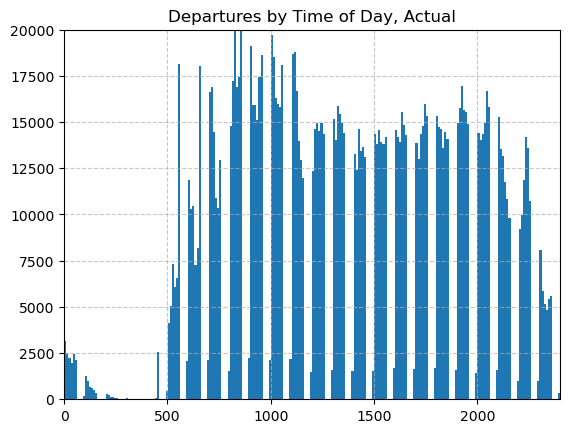

In [6]:
# Visualize Departures by Time of Day

plt.hist(x='DepTime', data=df, bins = 240)
plt.title("Departures by Time of Day, Actual")
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.xlim(0, 2400)
plt.ylim(0, 20000)  # Set y-axis limits to 0 to 20000
plt.show()

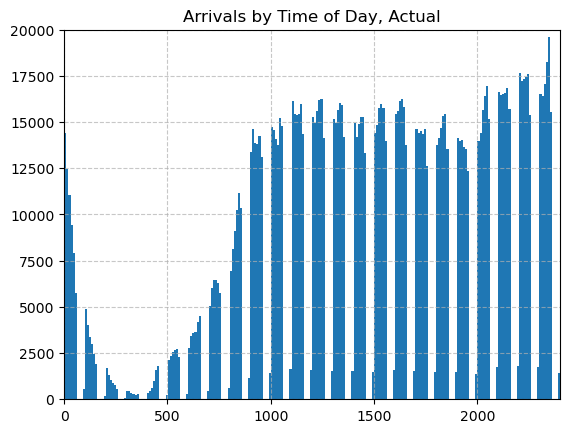

In [7]:
# Visualize Arrivals by Time of Day

plt.hist(x='ArrTime', data=df, bins = 240)
plt.title("Arrivals by Time of Day, Actual")
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.xlim(0, 2400)
plt.ylim(0, 20000)  # Set y-axis limits to 0 to 20000
plt.show()

In [63]:
# Get Average & Max Departure Tiem
deptime_df = df.dropna(subset='DepTime')
print(df['DepTime'].isna().mean())
print(df['DepTime'].max())

0.019686010490499787
2400.0


### Time on Tarmac

In [11]:
# let's investigate congestion on the runways, in terms of 'time on tarmac'. This is calculated by:
df.loc[:,['TaxiOut', 'DepTime']].head(10)

,TaxiOut,DepTime
0,13.0,832.0
1,11.0,1505.0
2,18.0,2105.0
3,14.0,1547.0
4,14.0,819.0
5,9.0,2251.0
6,16.0,1953.0
7,11.0,2304.0
8,9.0,1435.0
9,26.0,1013.0


In [64]:
# I want to see the median TaxiOut and TaxiIn times by hour. Need to format the time columns as int, DepTime and ArrTime. 
# Also need to drop null rows
df = df.dropna(subset=['DepTime'])
df = df.astype({'DepTime':'int'})

df.loc[:,['DepTime']].describe()

,DepTime
count,1.621506e+06
mean,1.387697e+03
std,5.275619e+02
min,1.000000e+00
25%,9.430000e+02
50%,1.356000e+03
75%,1.835000e+03
max,2.400000e+03


In [18]:
# Mean Taxi Out Times by time of day:
mean_taxi_out = df.groupby('DepTimeBlk')['TaxiOut'].mean()
mean_taxi_out

DepTimeBlk
0001-0559    14.778403
0600-0659    16.703907
0700-0759    16.894426
0800-0859    17.558694
0900-0959    18.091954
1000-1059    17.975834
1100-1159    17.071662
1200-1259    16.613509
1300-1359    17.025549
1400-1459    16.744028
1500-1559    16.688107
1600-1659    16.869816
1700-1759    17.487174
1800-1859    17.303490
1900-1959    17.219457
2000-2059    16.857116
2100-2159    16.310532
2200-2259    15.515787
2300-2359    16.529436
Name: TaxiOut, dtype: float64

In [19]:
# Median Taxi Out Times by time of day:
med_taxi_out = df.groupby('DepTimeBlk')['TaxiOut'].median()
med_taxi_out

DepTimeBlk
0001-0559    13.0
0600-0659    15.0
0700-0759    15.0
0800-0859    16.0
0900-0959    16.0
1000-1059    16.0
1100-1159    15.0
1200-1259    15.0
1300-1359    15.0
1400-1459    15.0
1500-1559    15.0
1600-1659    15.0
1700-1759    15.0
1800-1859    15.0
1900-1959    15.0
2000-2059    15.0
2100-2159    15.0
2200-2259    14.0
2300-2359    15.0
Name: TaxiOut, dtype: float64

#### Findings
**Ok those times were all pretty close..doesn't look like much of a relationship b/w time of day, and time on Tarmac.**

### Time on Tarmac w/ Airports/Airlines

In [20]:
# Mean Taxi-In Time by Airport
mean_taxi_out_arpt = df.groupby('Origin')['TaxiOut'].mean()
mean_taxi_out_arpt.sort_values(ascending=False)

Origin
ORD    19.753494
MIA    19.703795
MCO    17.906639
CLT    17.717713
LAS    17.516587
DFW    17.436443
LAX    16.789709
DEN    16.529361
ATL    15.070234
PHX    14.204406
Name: TaxiOut, dtype: float64

**Differences by airport are larger - probably worth investigating. Let's also look at airline now**

In [22]:
# Mean Taxi-In times by Airline
mean_taxi_in_arln = df.groupby('IATA_Code_Operating_Airline')['TaxiIn'].mean()
mean_taxi_in_arln.sort_values(ascending=False)

IATA_Code_Operating_Airline
HA    10.917832
F9    10.395974
NK     9.551462
AS     9.498478
B6     9.323310
AA     7.791018
UA     7.765471
DL     7.381470
G4     6.694558
WN     5.501483
Name: TaxiIn, dtype: float64

In [23]:
# Mean Taxi-Out Times by Airline
mean_taxi_out_arln = df.groupby('IATA_Code_Operating_Airline')['TaxiOut'].mean()
mean_taxi_out_arln.sort_values(ascending=False)

IATA_Code_Operating_Airline
AS    21.399497
G4    19.657021
UA    19.536647
B6    18.917880
F9    18.810373
AA    17.858750
NK    16.901503
DL    15.798987
HA    15.007493
WN    14.048366
Name: TaxiOut, dtype: float64

#### Question:
**What are the most common departure airports by airline? And what flight volumes proportionally happen at the 'worst' performing airports**

#### Findings: 
**We have found a couple of potential drivers of Time on Tarmac: Airport and Airline**
- need to test these varible relationships for statistical significance
- interesting follow up questions: 
- why are airlines and airports driving these differences? 
- does poor performance on Time on Tarmac track with delays and cancellations as well?
- Do these airlinines have a disproportionate amount of flights at 'congested' or peak hours?
- Is there variable interaction between airport and airline? IE do certain airlines primarily fly out of certain airports?

- customer value story idea: how much time does the baseline customer spend on the runway/delayed/how likely is it that their flight will be cancelled? Then compare airlines average perfomance to this 'baseline' customer, to evaluate better/worse.

### Airport Efficiency

In [68]:
#Which airlines fly out of which airports, by count?
flt_by_arln_arpt = df.groupby(['Marketing_Airline_Network','Origin']).size().reset_index(name='FlightCount')
print(flt_by_arln_arpt.sort_values(by='Origin', ascending=False))

   Marketing_Airline_Network Origin  FlightCount
84                        WN    PHX        58313
9                         AA    PHX        48289
51                        G4    PHX          337
47                        F9    PHX         5319
38                        DL    PHX         9434
..                       ...    ...          ...
19                        B6    ATL         2234
66                        UA    ATL         5464
39                        F9    ATL         8267
56                        NK    ATL        11678
0                         AA    ATL         6632

[85 rows x 3 columns]


In [69]:
# Which airports have the most flights (departures) per year?
most_deps = df.groupby('Origin').size().reset_index(name='dep_count')
most_deps.sort_values(by = 'dep_count', ascending=False)

,Origin,dep_count
0,ATL,272844
2,DEN,210099
3,DFW,175069
4,LAS,174835
8,ORD,153918
5,LAX,146757
6,MCO,144213
9,PHX,137770
1,CLT,121136
7,MIA,84865


In [70]:
most_deps['dep_proportion'] = most_deps['dep_count']/most_deps['dep_count'].sum()
most_deps.sort_values(by='dep_proportion', ascending=False)

,Origin,dep_count,dep_proportion
0,ATL,272844,0.168266
2,DEN,210099,0.129570
3,DFW,175069,0.107967
4,LAS,174835,0.107823
8,ORD,153918,0.094923
5,LAX,146757,0.090507
6,MCO,144213,0.088938
9,PHX,137770,0.084964
1,CLT,121136,0.074706
7,MIA,84865,0.052337


In [74]:
df['is_delay'] = df['DepDelayMinutes'] > 0
df.loc[:,['is_delay', 'DepDelayMinutes']]

,is_delay,DepDelayMinutes
0,True,12.0
1,True,25.0
2,True,70.0
3,True,37.0
4,False,0.0
...,...,...
1654063,False,0.0
1654064,False,0.0
1654065,False,0.0
1654066,False,0.0


## Minimum Connection Times

- https://www.oag.com/blog/minimum-connection-times-insiders-guide
- different by airport and airline, but rules for MCTs are set by IATA
- generally, these rules are 30 mins for domestic to domestic connections, 60 mins for domestic to international, 90 mins for interantional to international
- following categories: 'hi_imp_dom' = >15 min delay, 'hi_imp_int' = >30 min delay. Basically if it is a delay greater than half of the MCT, then the delay is specificed on having a high impact on that connecting mechansim. These categories broadly express a higher than normal liklihood of missing a connection

In [75]:
# Define domestic & international delay flags
df['hi_imp_dom'] = df['DepDelayMinutes'] > 15
df['hi_imp_int'] = df['DepDelayMinutes'] > 30

In [76]:
df.loc[:,['hi_imp_dom','hi_imp_int']]

,hi_imp_dom,hi_imp_int
0,False,False
1,True,False
2,True,True
3,True,True
4,False,False
...,...,...
1654063,False,False
1654064,False,False
1654065,False,False
1654066,False,False


In [77]:
# What is the number of delayed flights
print((df.is_delay == True).sum())

746881


**Baseline for Delay Proportions**

In [78]:
# what is the percentage of delayed flights? 46%
num_delayed_flights = (df.is_delay == True).sum()
pct_delayed_flights = num_delayed_flights/len(df)
pct_delayed_flights

0.4606094581210307

In [79]:
# what is the percentage of delayed flights that impact domestic connections?
dom_delayed_flights = (df.hi_imp_dom == True).sum()
pct_dom_delayed_flights = dom_delayed_flights/len(df)
pct_dom_delayed_flights

0.2416969163234672

In [80]:
# what is the percentage of delayed flights that impact domestic connections?
int_delayed_flights = (df.hi_imp_int == True).sum()
pct_int_delayed_flights = int_delayed_flights/len(df)
pct_int_delayed_flights

0.15491709558891548

### Takeaways:
1. 46% of flights in the Train dataset have a non-zero delay time
2. 24% of flights have delays large enough to impact chance of catching a domestic connection
3. 15% of flights have delays large enough to impact chance of catching an international connection

### Delays Investigation

In [81]:
# Delays per Airline
df[df['is_delay']==True].groupby('IATA_Code_Operating_Airline').size().reset_index(name='delay_count')

,IATA_Code_Operating_Airline,delay_count
0,AA,204300
1,AS,10544
2,B6,20882
3,DL,121039
4,F9,39315
5,G4,4530
6,HA,1754
7,NK,46620
8,UA,92136
9,WN,205761


In [82]:
# Delays with impact numbers
delays_by_airline = df.groupby('IATA_Code_Operating_Airline').agg(
    total_flights=('IATA_Code_Operating_Airline', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airline

,IATA_Code_Operating_Airline,total_flights,count_delays,count_dom_delays,count_int_delays
0,AA,472509,204300,113474,77459
1,AS,28623,10544,5265,3336
2,B6,41352,20882,13286,9594
3,DL,325814,121039,57315,34982
4,F9,78476,39315,25376,17513
5,G4,10542,4530,2683,1783
6,HA,4005,1754,634,356
7,NK,102599,46620,26226,17329
8,UA,231460,92136,44857,30333
9,WN,326126,205761,102797,58514


In [83]:
delays_by_airline['delays_prop'] = delays_by_airline['count_delays']/delays_by_airline['total_flights']
delays_by_airline['dom_delays_prop'] = delays_by_airline['count_dom_delays']/delays_by_airline['total_flights']
delays_by_airline['int_delays_prop'] = delays_by_airline['count_int_delays']/delays_by_airline['total_flights']

delays_by_airline

,IATA_Code_Operating_Airline,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
0,AA,472509,204300,113474,77459,0.432373,0.240152,0.163931
1,AS,28623,10544,5265,3336,0.368375,0.183943,0.116550
2,B6,41352,20882,13286,9594,0.504982,0.321290,0.232008
3,DL,325814,121039,57315,34982,0.371497,0.175913,0.107368
4,F9,78476,39315,25376,17513,0.500981,0.323360,0.223164
5,G4,10542,4530,2683,1783,0.429710,0.254506,0.169133
6,HA,4005,1754,634,356,0.437953,0.158302,0.088889
7,NK,102599,46620,26226,17329,0.454390,0.255617,0.168900
8,UA,231460,92136,44857,30333,0.398064,0.193800,0.131051
9,WN,326126,205761,102797,58514,0.630925,0.315206,0.179421


#### Most Delayed Airlines, by delayed flight proportion

In [38]:
delays_by_airline.sort_values(by='delays_prop', ascending=False)

,IATA_Code_Operating_Airline,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
9,WN,326126,205761,102797,58514,0.630925,0.315206,0.179421
2,B6,41352,20882,13286,9594,0.504982,0.321290,0.232008
4,F9,78476,39315,25376,17513,0.500981,0.323360,0.223164
7,NK,102599,46620,26226,17329,0.454390,0.255617,0.168900
6,HA,4005,1754,634,356,0.437953,0.158302,0.088889
0,AA,472509,204300,113474,77459,0.432373,0.240152,0.163931
5,G4,10542,4530,2683,1783,0.429710,0.254506,0.169133
8,UA,231460,92136,44857,30333,0.398064,0.193800,0.131051
3,DL,325814,121039,57315,34982,0.371497,0.175913,0.107368
1,AS,28623,10544,5265,3336,0.368375,0.183943,0.116550


#### Most Delayed Airports, by delay proportion

In [39]:
delays_by_airport = df.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport['delays_prop'] = delays_by_airport['count_delays']/delays_by_airport['total_flights']
delays_by_airport['dom_delays_prop'] = delays_by_airport['count_dom_delays']/delays_by_airport['total_flights']
delays_by_airport['int_delays_prop'] = delays_by_airport['count_int_delays']/delays_by_airport['total_flights']

delays_by_airport.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
2,DEN,210099,119378,60508,36841,0.568199,0.287998,0.175351
4,LAS,174835,89944,48523,30241,0.514451,0.277536,0.172969
6,MCO,144213,68887,39736,26784,0.477675,0.275537,0.185725
9,PHX,137770,65366,32518,19804,0.474457,0.236031,0.143747
7,MIA,84865,39363,21566,14492,0.463831,0.254121,0.170765
3,DFW,175069,80501,45890,31384,0.459824,0.262125,0.179266
8,ORD,153918,63867,33492,22716,0.414942,0.217596,0.147585
1,CLT,121136,49581,27382,18591,0.409300,0.226043,0.153472
0,ATL,272844,110762,53645,32254,0.405954,0.196614,0.118214
5,LAX,146757,59232,28653,18092,0.403606,0.195241,0.123279


##### Takeaways for Airline Delays:
1. There is real difference among these airlines and their delay percentage. It is easy to flag the underperformers here.
2. Follow on question - is this poor airline performance driven by airport/airport specific? Let's run a similar analysis by airport to see how these airlines are perfoming at different airports. This may be a 'good airline, bad airport' story, instead of what looks like a good v bad airline story

#### Delays by Airport, with Airline as Data Subsets

##### WN

In [40]:
# let's take our worst performing airline, df['IATA_Code_Operating_Airline'] == 'WN', and produce a data subset

df_wn = df[df['IATA_Code_Operating_Airline'] == 'WN']
df_wn.shape

(326126, 90)

In [41]:
delays_by_airport = df_wn.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

In [43]:
delays_by_airport['delays_prop'] = delays_by_airport['count_delays']/delays_by_airport['total_flights']
delays_by_airport['dom_delays_prop'] = delays_by_airport['count_dom_delays']/delays_by_airport['total_flights']
delays_by_airport['int_delays_prop'] = delays_by_airport['count_int_delays']/delays_by_airport['total_flights']

delays_by_airport.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
2,DEN,82226,58354,30088,16710,0.709678,0.365918,0.203220
3,LAS,74648,48759,25709,14926,0.653186,0.344403,0.199952
8,PHX,58313,36846,17781,9960,0.631866,0.304923,0.170802
5,MCO,35052,20178,9902,5836,0.575659,0.282495,0.166495
0,ATL,31382,17746,8138,4573,0.565483,0.259321,0.145720
7,ORD,9035,5056,2570,1520,0.559602,0.284449,0.168235
6,MIA,6466,3562,1750,1055,0.550882,0.270646,0.163161
1,CLT,2669,1424,638,348,0.533533,0.239041,0.130386
4,LAX,26335,13836,6221,3586,0.525384,0.236226,0.136169


##### B6

In [44]:
df_b6 = df[df['IATA_Code_Operating_Airline'] == 'B6']
df_b6.shape

(41352, 90)

In [45]:
delays_by_airport_b6 = df_b6.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_b6['delays_prop'] = delays_by_airport_b6['count_delays']/delays_by_airport_b6['total_flights']
delays_by_airport_b6['dom_delays_prop'] = delays_by_airport_b6['count_dom_delays']/delays_by_airport_b6['total_flights']
delays_by_airport_b6['int_delays_prop'] = delays_by_airport_b6['count_int_delays']/delays_by_airport_b6['total_flights']

delays_by_airport_b6.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
9,PHX,1112,740,528,390,0.665468,0.474820,0.350719
0,ATL,2234,1378,818,562,0.616831,0.366159,0.251567
4,LAS,3219,1959,1273,910,0.608574,0.395464,0.282696
2,DEN,1826,1056,720,525,0.578313,0.394304,0.287514
6,MCO,16306,8438,5605,4204,0.517478,0.343739,0.257819
7,MIA,3035,1404,889,642,0.462603,0.292916,0.211532
5,LAX,11020,4900,2786,1867,0.444646,0.252813,0.169419
3,DFW,704,283,183,132,0.401989,0.259943,0.187500
1,CLT,703,277,160,117,0.394026,0.227596,0.166430
8,ORD,1193,447,324,245,0.374686,0.271584,0.205365


##### F9

In [46]:
df_f9 = df[df['IATA_Code_Operating_Airline'] == 'B6']
df_f9.shape

(41352, 90)

In [47]:
delays_by_airport_f9 = df_f9.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_f9['delays_prop'] = delays_by_airport_f9['count_delays']/delays_by_airport_f9['total_flights']
delays_by_airport_f9['dom_delays_prop'] = delays_by_airport_f9['count_dom_delays']/delays_by_airport_f9['total_flights']
delays_by_airport_f9['int_delays_prop'] = delays_by_airport_f9['count_int_delays']/delays_by_airport_f9['total_flights']

delays_by_airport_f9.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
9,PHX,1112,740,528,390,0.665468,0.474820,0.350719
0,ATL,2234,1378,818,562,0.616831,0.366159,0.251567
4,LAS,3219,1959,1273,910,0.608574,0.395464,0.282696
2,DEN,1826,1056,720,525,0.578313,0.394304,0.287514
6,MCO,16306,8438,5605,4204,0.517478,0.343739,0.257819
7,MIA,3035,1404,889,642,0.462603,0.292916,0.211532
5,LAX,11020,4900,2786,1867,0.444646,0.252813,0.169419
3,DFW,704,283,183,132,0.401989,0.259943,0.187500
1,CLT,703,277,160,117,0.394026,0.227596,0.166430
8,ORD,1193,447,324,245,0.374686,0.271584,0.205365


##### NK

In [48]:
df_nk = df[df['IATA_Code_Operating_Airline'] == 'NK']
df_nk.shape

(102599, 90)

In [49]:
delays_by_airport_nk = df_nk.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_nk['delays_prop'] = delays_by_airport_nk['count_delays']/delays_by_airport_nk['total_flights']
delays_by_airport_nk['dom_delays_prop'] = delays_by_airport_nk['count_dom_delays']/delays_by_airport_nk['total_flights']
delays_by_airport_nk['int_delays_prop'] = delays_by_airport_nk['count_int_delays']/delays_by_airport_nk['total_flights']

delays_by_airport_nk.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
1,CLT,1874,969,596,393,0.517076,0.318036,0.209712
6,MCO,25082,12855,7902,5194,0.512519,0.315047,0.207081
8,ORD,7835,3699,2002,1311,0.472112,0.255520,0.167326
4,LAS,25898,12053,6425,4155,0.465403,0.248089,0.160437
3,DFW,8383,3814,1984,1306,0.454968,0.236669,0.155791
0,ATL,11678,5162,2684,1758,0.442028,0.229834,0.150539
2,DEN,1860,807,443,302,0.433871,0.238172,0.162366
9,PHX,1440,615,374,255,0.427083,0.259722,0.177083
5,LAX,10829,4052,2201,1474,0.374180,0.203251,0.136116
7,MIA,7720,2594,1615,1181,0.336010,0.209197,0.152979


##### AA

In [50]:
df_AA = df[df['IATA_Code_Operating_Airline'] == 'AA']
df_AA.shape

(472509, 90)

In [51]:
delays_by_airport_AA = df_AA.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_AA['delays_prop'] = delays_by_airport_AA['count_delays']/delays_by_airport_AA['total_flights']
delays_by_airport_AA['dom_delays_prop'] = delays_by_airport_AA['count_dom_delays']/delays_by_airport_AA['total_flights']
delays_by_airport_AA['int_delays_prop'] = delays_by_airport_AA['count_int_delays']/delays_by_airport_AA['total_flights']

delays_by_airport_AA.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
7,MIA,51028,24567,13453,9071,0.481442,0.263640,0.177765
3,DFW,142508,68354,39273,26872,0.479650,0.275585,0.188565
8,ORD,50223,22740,12940,8949,0.452781,0.257651,0.178185
1,CLT,107139,44219,24573,16792,0.412726,0.229356,0.156731
5,LAX,29090,11278,5679,3796,0.387693,0.195222,0.130492
9,PHX,48289,17618,8926,5917,0.364845,0.184845,0.122533
2,DEN,8018,2882,1612,1103,0.359441,0.201048,0.137565
0,ATL,6632,2340,1289,918,0.352835,0.194361,0.138420
4,LAS,12759,4489,2409,1660,0.351830,0.188808,0.130104
6,MCO,16823,5813,3320,2381,0.345539,0.197349,0.141532


##### HA

In [52]:
df_HA = df[df['IATA_Code_Operating_Airline'] == 'HA']
df_HA.shape

(4005, 90)

In [53]:
delays_by_airport_HA = df_HA.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_HA['delays_prop'] = delays_by_airport_HA['count_delays']/delays_by_airport_HA['total_flights']
delays_by_airport_HA['dom_delays_prop'] = delays_by_airport_HA['count_dom_delays']/delays_by_airport_HA['total_flights']
delays_by_airport_HA['int_delays_prop'] = delays_by_airport_HA['count_int_delays']/delays_by_airport_HA['total_flights']

delays_by_airport_HA.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
2,MCO,69,61,43,19,0.884058,0.623188,0.275362
0,LAS,1331,682,262,150,0.512397,0.196844,0.112697
1,LAX,2243,882,272,147,0.393223,0.121266,0.065537
3,PHX,362,129,57,40,0.356354,0.157459,0.110497


##### G4

In [54]:
df_G4 = df[df['IATA_Code_Operating_Airline'] == 'G4']
df_G4.shape

(10542, 90)

In [55]:
delays_by_airport_G4 = df_G4.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_G4['delays_prop'] = delays_by_airport_G4['count_delays']/delays_by_airport_G4['total_flights']
delays_by_airport_G4['dom_delays_prop'] = delays_by_airport_G4['count_dom_delays']/delays_by_airport_G4['total_flights']
delays_by_airport_G4['int_delays_prop'] = delays_by_airport_G4['count_int_delays']/delays_by_airport_G4['total_flights']

delays_by_airport_G4.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
3,PHX,337,232,149,103,0.688427,0.442136,0.305638
0,DEN,422,227,135,92,0.537915,0.319905,0.218009
1,LAS,8567,3666,2175,1451,0.427921,0.253881,0.169371
2,LAX,1216,405,224,137,0.333059,0.184211,0.112664


##### UA

In [56]:
df_UA = df[df['IATA_Code_Operating_Airline'] == 'UA']
df_UA.shape

(231460, 90)

In [57]:
delays_by_airport_UA = df_UA.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_UA['delays_prop'] = delays_by_airport_UA['count_delays']/delays_by_airport_UA['total_flights']
delays_by_airport_UA['dom_delays_prop'] = delays_by_airport_UA['count_dom_delays']/delays_by_airport_UA['total_flights']
delays_by_airport_UA['int_delays_prop'] = delays_by_airport_UA['count_int_delays']/delays_by_airport_UA['total_flights']

delays_by_airport_UA.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
2,DEN,81831,40407,19057,12719,0.493786,0.232882,0.155430
7,MIA,5126,2210,1161,790,0.431135,0.226492,0.154116
8,ORD,71963,26771,13034,8943,0.372011,0.181121,0.124272
6,MCO,12201,4529,2298,1576,0.371199,0.188345,0.129170
1,CLT,2187,811,409,270,0.370828,0.187014,0.123457
0,ATL,5464,1977,1045,706,0.361823,0.191252,0.129209
4,LAS,12335,3799,2064,1459,0.307985,0.167329,0.118281
5,LAX,24312,7274,3358,2123,0.299194,0.138121,0.087323
3,DFW,7263,2009,1173,863,0.276607,0.161504,0.118821
9,PHX,8778,2349,1258,884,0.267601,0.143313,0.100706


##### DL

In [58]:
df_DL = df[df['IATA_Code_Operating_Airline'] == 'DL']
df_DL.shape

(325814, 90)

In [59]:
delays_by_airport_DL = df_DL.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_DL['delays_prop'] = delays_by_airport_DL['count_delays']/delays_by_airport_DL['total_flights']
delays_by_airport_DL['dom_delays_prop'] = delays_by_airport_DL['count_dom_delays']/delays_by_airport_DL['total_flights']
delays_by_airport_DL['int_delays_prop'] = delays_by_airport_DL['count_int_delays']/delays_by_airport_DL['total_flights']

delays_by_airport_DL.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
7,MIA,8338,3692,1817,1148,0.442792,0.217918,0.137683
2,DEN,10835,4512,1982,1211,0.416428,0.182926,0.111767
5,LAX,32704,13441,6329,3924,0.410989,0.193524,0.119985
0,ATL,206249,76893,36172,21270,0.372816,0.175380,0.103128
9,PHX,9434,3307,1379,845,0.350541,0.146173,0.089570
8,ORD,10202,3550,1750,1180,0.347971,0.171535,0.115664
6,MCO,18541,6392,3542,2487,0.344749,0.191036,0.134135
4,LAS,14092,4822,2220,1481,0.342180,0.157536,0.105095
3,DFW,10192,3184,1529,1044,0.312402,0.150020,0.102433
1,CLT,5227,1246,595,392,0.238378,0.113832,0.074995


##### AS

In [60]:
df_AS = df[df['IATA_Code_Operating_Airline'] == 'AS']
df_AS.shape

(28623, 90)

In [61]:
delays_by_airport_AS = df_AS.groupby('Origin').agg(
    total_flights=('Origin', 'size'),  # Total number of rows per airline
    count_delays=('is_delay', 'sum'),  # Count of True values in ConditionColumn per airline
    count_dom_delays=('hi_imp_dom', 'sum'),
    count_int_delays=('hi_imp_int', 'sum')
).reset_index()

delays_by_airport_AS['delays_prop'] = delays_by_airport_AS['count_delays']/delays_by_airport_AS['total_flights']
delays_by_airport_AS['dom_delays_prop'] = delays_by_airport_AS['count_dom_delays']/delays_by_airport_AS['total_flights']
delays_by_airport_AS['int_delays_prop'] = delays_by_airport_AS['count_int_delays']/delays_by_airport_AS['total_flights']

delays_by_airport_AS.sort_values(by='delays_prop', ascending=False)

,Origin,total_flights,count_delays,count_dom_delays,count_int_delays,delays_prop,dom_delays_prop,int_delays_prop
1,DEN,1790,821,429,262,0.458659,0.239665,0.146369
5,MCO,2235,981,522,354,0.438926,0.233557,0.158389
7,ORD,2728,1183,569,352,0.433651,0.208578,0.129032
0,ATL,938,388,168,89,0.413646,0.179104,0.094883
2,DFW,1829,744,354,200,0.406780,0.193548,0.109349
6,MIA,278,98,44,19,0.352518,0.158273,0.068345
4,LAX,9008,3164,1583,1038,0.351243,0.175733,0.115231
3,LAS,5431,1828,953,624,0.336586,0.175474,0.114896
8,PHX,4386,1337,643,398,0.304834,0.146603,0.090743


### Takeaways on Delays:
1. After looking at the delay proportions each airline experiences at each airport, there isn't a clear story indicating that airport is explanatory in terms of delay. Fact that different airlines experience different proportions of delay at the same airports indicates that it is either the airlines themselves or a third variable that is the primary driver of delay.